In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import env

# 1. Acquire data from mySQL using the python module to connect and query. You will want to end with a single dataframe. Make sure to include: the logerror, all fields related to the properties that are available. You will end up using all the tables in the database.

## - Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid.

## - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction.

## - Only include properties that include a latitude and longitude value.

In [3]:
sql = '''
SELECT prop.*, 
       pred.logerror, 
       pred.transactiondate, 
       air.airconditioningdesc, 
       arch.architecturalstyledesc, 
       build.buildingclassdesc, 
       heat.heatingorsystemdesc, 
       landuse.propertylandusedesc, 
       story.storydesc, 
       construct.typeconstructiondesc 
FROM   properties_2017 prop  
       INNER JOIN (SELECT parcelid,
       					  logerror,
                          Max(transactiondate) transactiondate 
                   FROM   predictions_2017 
                   GROUP  BY parcelid, logerror) pred
               USING (parcelid) 
       LEFT JOIN airconditioningtype air USING (airconditioningtypeid) 
       LEFT JOIN architecturalstyletype arch USING (architecturalstyletypeid) 
       LEFT JOIN buildingclasstype build USING (buildingclasstypeid) 
       LEFT JOIN heatingorsystemtype heat USING (heatingorsystemtypeid) 
       LEFT JOIN propertylandusetype landuse USING (propertylandusetypeid) 
       LEFT JOIN storytype story USING (storytypeid) 
       LEFT JOIN typeconstructiontype construct USING (typeconstructiontypeid) 
WHERE  prop.latitude IS NOT NULL 
       AND prop.longitude IS NOT NULL;
'''

In [4]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [5]:
df = pd.read_sql(sql, get_connection('zillow'))

df.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1087254,10711855,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,...,6.037113e+13,-0.007357,2017-07-07,None,None,None,Central,Single Family Residential,None,None
1,1072280,10711877,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,...,6.037113e+13,0.021066,2017-08-29,Central,None,None,Central,Single Family Residential,None,None
2,1340933,10711888,1.0,NaN,NaN,2.0,4.0,NaN,8.0,2.0,...,6.037113e+13,0.077174,2017-04-04,Central,None,None,Central,Single Family Residential,None,None
3,1878109,10711910,NaN,NaN,NaN,2.0,3.0,NaN,8.0,2.0,...,6.037113e+13,-0.041238,2017-03-17,None,None,None,Central,Single Family Residential,None,None
4,2190858,10711923,NaN,NaN,NaN,2.0,4.0,NaN,8.0,2.0,...,6.037113e+13,-0.009496,2017-03-24,None,None,None,Central,Single Family Residential,None,None


In [6]:
longindex = df.loc[df['longitude'].isin(['NaN'])].index


In [7]:
df.drop(longindex , inplace=True)


In [8]:
df.to_csv('zillow.csv')

# 2. Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [9]:
df.shape

(77575, 68)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77575 entries, 0 to 77574
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            77575 non-null  int64  
 1   parcelid                      77575 non-null  int64  
 2   airconditioningtypeid         25006 non-null  float64
 3   architecturalstyletypeid      206 non-null    float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   77575 non-null  float64
 6   bedroomcnt                    77575 non-null  float64
 7   buildingclasstypeid           15 non-null     float64
 8   buildingqualitytypeid         49809 non-null  float64
 9   calculatedbathnbr             76960 non-null  float64
 10  decktypeid                    614 non-null    float64
 11  finishedfloor1squarefeet      6035 non-null   float64
 12  calculatedfinishedsquarefeet  77375 non-null  float64
 13  f

In [11]:
list(df.columns)

['id',
 'parcelid',
 'airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'decktypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fips',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'heatingorsystemtypeid',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'propertyzoningdesc',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'roomcnt',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'numberofstories',


<AxesSubplot:>

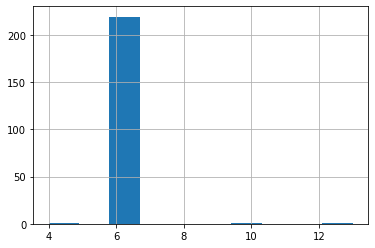

In [12]:
df.typeconstructiontypeid.hist()

<AxesSubplot:>

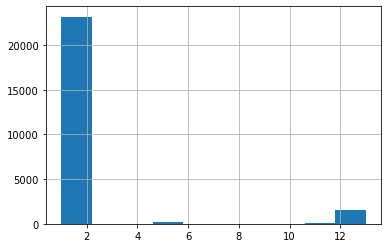

In [13]:
df.airconditioningtypeid.hist()

<AxesSubplot:>

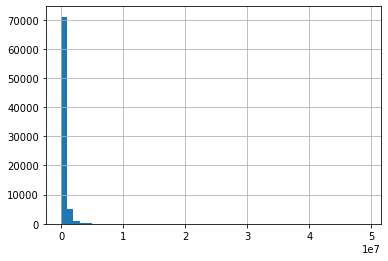

In [14]:
df.taxvaluedollarcnt.hist(bins = 50)

In [15]:
## possibly very strong outliers

<AxesSubplot:>

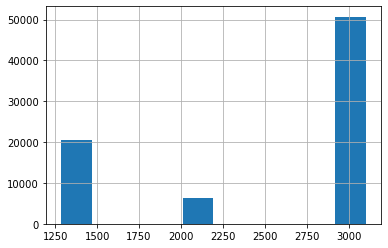

In [16]:
df.regionidcounty.hist()

In [17]:
df.isnull().sum()


id                              0
parcelid                        0
airconditioningtypeid       52569
architecturalstyletypeid    77369
basementsqft                77525
                            ...  
buildingclassdesc           77560
heatingorsystemdesc         28005
propertylandusedesc             0
storydesc                   77525
typeconstructiondesc        77353
Length: 68, dtype: int64

# 3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

# 4. Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

In [18]:
def missing_value_table(df):
    '''
    This function will take in a dataframe and will return a report detailing missing values in
    the dataframes various columns
    '''
    
    zero_val = (df == 0.00).astype(int).sum(axis=0)
    null_count = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mz_table = pd.concat([zero_val, null_count, mis_val_percent], axis=1)
    mz_table = mz_table.rename(
    columns = {0 : 'Zero Values', 1 : 'null_count', 2 : '% of Total Values'})
    mz_table['Total Zeroes + Null Values'] = mz_table['Zero Values'] + mz_table['null_count']
    mz_table['% Total Zero + Null Values'] = 100 * mz_table['Total Zeroes + Null Values'] / len(df)
    mz_table['Data Type'] = df.dtypes
    mz_table = mz_table[
        mz_table.iloc[:,1] >= 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " +  str((mz_table['null_count'] != 0).sum()) +
          " columns that have NULL values.")
#         mz_table.to_excel('D:/sampledata/missing_and_zero_values.xlsx', freeze_panes=(1,0), index = False)

    return mz_table



In [19]:
missing_value_table(df)

Your selected dataframe has 68 columns and 77575 Rows.
There are 52 columns that have NULL values.


,Zero Values,null_count,% of Total Values,Total Zeroes + Null Values,% Total Zero + Null Values,Data Type
buildingclassdesc,0,77560,100.0,77560,100.0,object
buildingclasstypeid,0,77560,100.0,77560,100.0,float64
finishedsquarefeet13,0,77533,99.9,77533,99.9,float64
storytypeid,0,77525,99.9,77525,99.9,float64
basementsqft,0,77525,99.9,77525,99.9,float64
...,...,...,...,...,...,...
latitude,0,0,0.0,0,0.0,float64
fips,0,0,0.0,0,0.0,float64
bedroomcnt,836,0,0.0,836,1.1,float64
bathroomcnt,598,0,0.0,598,0.8,float64


## Prepare

# 1. Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

In [20]:
df.propertylandusetypeid.value_counts()

## anything below 250 is either multi unit or commercial, should be removed 

261.0    52439
266.0    19341
246.0     2021
269.0     1947
248.0      729
247.0      539
265.0      335
263.0       74
275.0       59
260.0       41
267.0       29
31.0        15
264.0        6
Name: propertylandusetypeid, dtype: int64

In [21]:
cleanpropindexes250 = df.loc[df['propertylandusetypeid'] <= 250].index

df.drop(cleanpropindexes250 , inplace=True)

In [22]:
df.shape

(74271, 68)

In [23]:
df.unitcnt.value_counts()

## multi unit homes still need to be removed 

1.0    47382
2.0       35
4.0        3
3.0        3
6.0        1
Name: unitcnt, dtype: int64

In [24]:
singlecountindexes = df.loc[df['unitcnt'] > 1].index

df.drop(singlecountindexes , inplace=True)

In [25]:
df.shape

(74229, 68)

In [26]:
df.unitcnt.isnull().value_counts()

False    47382
True     26847
Name: unitcnt, dtype: int64

In [27]:
## there are way too many nulls, but they are likely homes, they should be filled in with a 1

In [28]:
df["unitcnt"].fillna( 1 , inplace = True)

In [29]:
df.unitcnt.isnull().value_counts()

False    74229
Name: unitcnt, dtype: int64

# 2. Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

## The input:
#### - A dataframe
#### - A number between 0 and 1 that represents the proportion, for each column, of rows with non-missing values required to keep the column. i.e. if prop_required_column = .6, then you are requiring a column to have at least 60% of values not-NA (no more than 40% missing).
#### - A number between 0 and 1 that represents the proportion, for each row, of columns/variables with non-missing values required to keep the row. For example, if prop_required_row = .75, then you are requiring a row to have at least 75% of variables with a non-missing value (no more that 25% missing).

## The output:
#### - The dataframe with the columns and rows dropped as indicated. Be sure to drop the columns prior to the rows in your function.

In [30]:
def handle_missing_values(df, prop_required_row = 0.5, prop_required_col = 0.5):
    ''' function which takes in a dataframe, required notnull proportions of non-null rows and columns.
    drop the columns and rows columns based on theshold:'''
    
    #drop columns with nulls
    threshold = int(prop_required_col * len(df.index)) # Require that many non-NA values.
    df.dropna(axis = 1, thresh = threshold, inplace = True)
    
    #drop rows with nulls
    threshold = int(prop_required_row * len(df.columns)) # Require that many non-NA values.
    df.dropna(axis = 0, thresh = threshold, inplace = True)
    
    
    return df

In [31]:
df = handle_missing_values(df)

In [32]:
df.shape

(74229, 34)